# 18기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [46]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocessing/ EDA

### 데이터 탐색

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


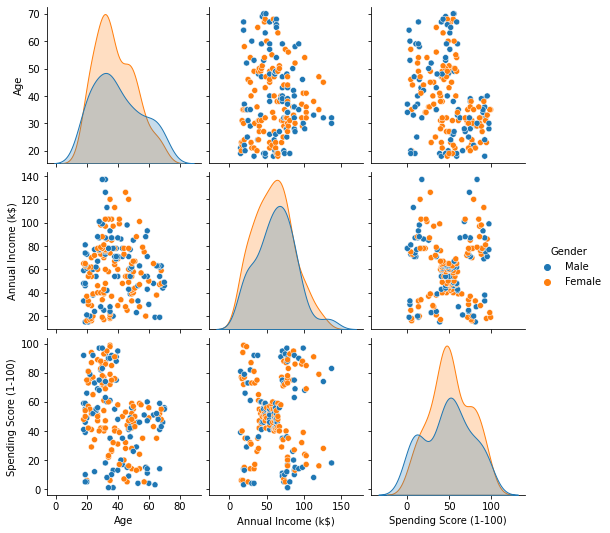

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue = "Gender")
plt.show()

가장 clustering 하기 좋은 변수는 'Spending Score'와 'Annual Income'이다. 
<br>
4~5개의 군집으로 나누어서 클러스터링을 진행할 수 있을 것 같다.

### 결측치 확인

In [49]:
# 결측치 개수 세기
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

결측치는 없음

In [50]:
df = df.drop(columns='Gender')

Gender 컬럼은 클러스터링할 때 필요가 없을 것 같아서 제거

### Scailing

In [54]:
from sklearn.preprocessing import StandardScaler
data = df.copy()

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data))
data

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


## 2. Clustering

K-Means Clustering을 하기 위해서는 군집의 개수를 정해야 하는데, Elbow Method를 이용해서 최적의 K를 찾아보도록 하겠습니다.

In [59]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

# 군집의 개수에 따른 SSE 확인
def SSE_plot(K, data):
    SSE = []
    for k in range(1,K+1):
        K_Means = KMeans(n_clusters = k).fit(data)
        SSE.append(K_Means.inertia_)
    
    plt.plot(range(1, K+1), SSE, 'o--', color='red')
    plt.xlabel('K')
    plt.ylabel('SSE')
    kn = KneeLocator(range(1, K+1), SSE, curve = 'convex', direction = 'decreasing')     # Elbow Point 찾기
    plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles = 'dashed')
    return SSE

[600.0,
 389.3861889564372,
 295.26029648861174,
 205.22514747675916,
 168.24758017556837,
 133.86842085478855,
 117.17517978708027,
 104.12452907599072,
 93.24350472596701]

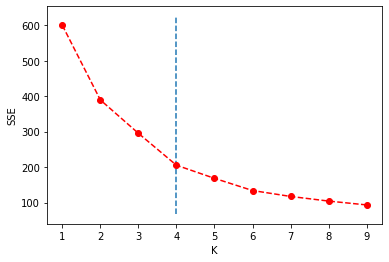

In [60]:
SSE_plot(K = 9, data = data)

Elbow point는 K=4 입니다.

In [68]:
K_Means = KMeans(n_clusters = 4).fit(data)
labels = K_Means.labels_

## 3. Evaluation

### Visualization

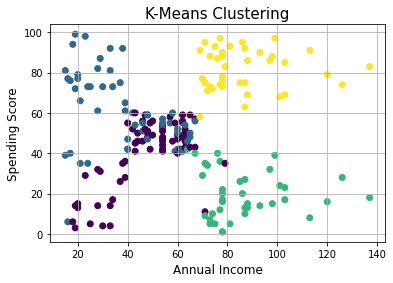

In [69]:
plt.title("K-Means Clustering", fontsize=15)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = labels)
plt.xlabel("Annual Income", fontsize = 12)
plt.ylabel("Spending Score", fontsize = 12)
plt.grid()
plt.show()

군집화한 것을 시각화 해 보았습니다. 그렇지만 결과가 만족스럽지 못하기 때문에 군집화의 개수를 5개로 늘려 다시 진행해보았습니다. 

In [70]:
K_Means = KMeans(n_clusters = 5).fit(data)
labels = K_Means.labels_

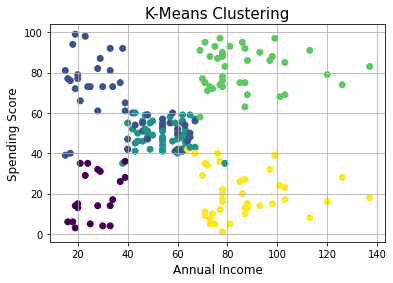

In [71]:
plt.title("K-Means Clustering", fontsize=15)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = labels)
plt.xlabel("Annual Income", fontsize = 12)
plt.ylabel("Spending Score", fontsize = 12)
plt.grid()
plt.show()

이 시각화한 자료를 보면 5개의 군집으로 나누어진 것을 볼 수 있습니다. 
<ol>
    <li>왼쪽 아래: 소비가 적고 연 소득이 적은 경향이 있는 그룹</li>
    <li>왼쪽 위: 소비는 많지만 연 소득이 적은 경향이 있는 그룹</li>
    <li>오른쪽 아래: 소비가 적고 연 소득이 높은 경향이 있는 그룹</li>
    <li>오른쪽 위: 소비가 많고 연 소득이 높은 경향이 있는 그룹</li>
    <li>가운데: 소비와 연 소득이 중간인 그룹</li>
</ol>